In [1]:
#######################
# Interpolates some f #
#######################
import radiant as rad
import numpy as np


# Problem Parameters
a = -0.5
b = 0.5


def exact(*x):
    return np.prod(np.cos((2 * np.pi * np.asarray(x) / (b - a)) ** 2) * 2 * np.pi * np.asarray(x) / (b - a), axis=0)


f = exact

In [2]:
# Parameters
d = 1
k = 1
inner = 5
outer = 3
start_delta = 1.
start_N = 3

# Computed Parameters
ranges = ((a, b),) * d
phi = rad.Wendland(d, k)
centre_thinning = 2. ** np.arange(0, inner)
delta_thinning = 2. ** np.arange(0, inner)
xcs = [rad.gridinc(ranges, inc, flat=True) for inc in (b - a) / (centre_thinning * start_N)]
deltas = start_delta / delta_thinning
integrator = rad.integrate.MeanIntegrator(ranges, 200)
# integrator = rad.integrate.QuadIntegrator(ranges)

# Solve for approximate solution
solver = rad.solve.MultilevelSolver(rad.solve.InterpolationSolver, phi, deltas, xcs, outer=outer)
approx = solver.solve(f)
error = rad.error(exact, approx, integrator)

print("L2 Relative Error:", error)
print("Condition Number:", solver.cond())

L2 Relative Error: 0.012013396271019747
Condition Number: [14.887728338058224, 32.76656576634818, 52.893513929266916, 60.72879036201137, 63.883545562142324]


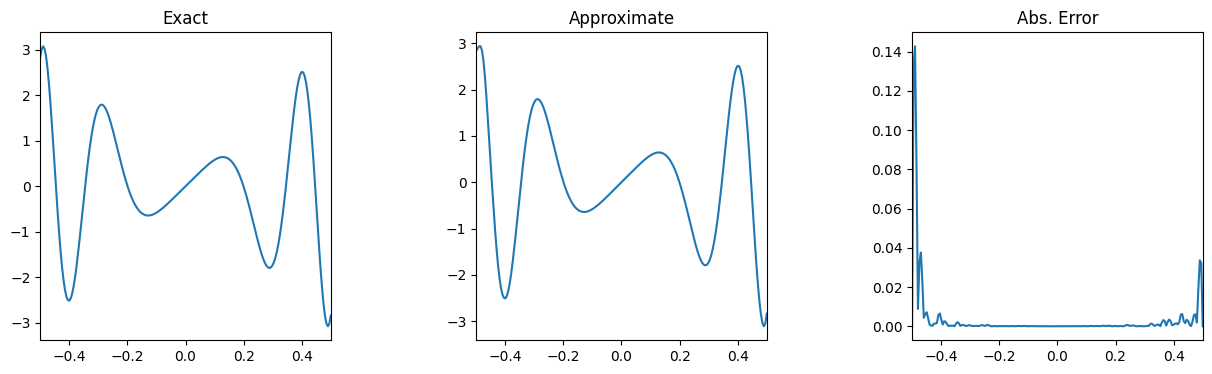

In [3]:
rad.plot.spread(
    ranges,
    exact,
    approx,
    lambda *x: np.abs(exact(*x) - approx(*x)),
    n=200,
    wspace=0.5,
    hspace=0.5,
    titles=["Exact", "Approximate", "Abs. Error"],
    figsize=(15, 4)
)

In [4]:
if d == 1:
    from IPython.display import HTML, display_html
    
    
    anim = rad.animate.ml_animate(ranges, exact, approx, n=200, figsize=(10, 4))
    display_html(HTML(anim.to_jshtml()))

Once 
 
 Loop 
 
 Reflect